# Exploratory Data Analysis - Ames Housing

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

# Carregando o dado
ames_train = pd.read_csv('ames_train.csv', sep=';')
ames_train = ames_train.iloc[:, 1:]
print(ames_train.shape)

(1000, 81)


# Preço

In [3]:
# Variável dependente: preço
price = ames_train['price']

In [4]:
# Estatísticas
ames_train.loc[:, ['price']].describe()

,price
count,1000.000000
mean,181190.076000
std,81909.787799
min,12789.000000
25%,129762.500000
50%,159467.000000
75%,213000.000000
max,615000.000000


<AxesSubplot:ylabel='Frequency'>

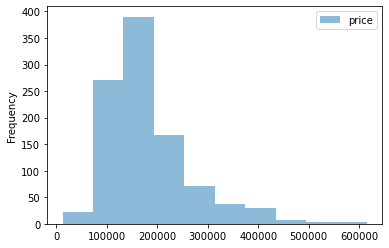

In [5]:
# Histograma
ames_train.loc[:, ['price']].plot.hist(alpha=0.5)

O gráfico mostra a distribuição dos preços das casas. É possível perceber que os preços que mais aparecem estão entre 100.000 e 200.000. O quadro acima confirma isso, já que 75% das casas tem um preço de até 213.000. Os preços mais altos na base de dados estão na faixa de 500.000 e 600.000, porém, aparecem poucas vezes.

# Idade

In [6]:
# Idade
ames_train['age'] = 2021 - ames_train['Year.Built']
age = ames_train['age']

In [7]:
# Estatísticas
ames_train.loc[:, ['age']].describe()

,age
count,1000.000000
mean,48.797000
std,29.637412
min,11.000000
25%,20.000000
50%,46.000000
75%,66.000000
max,149.000000


<AxesSubplot:ylabel='Frequency'>

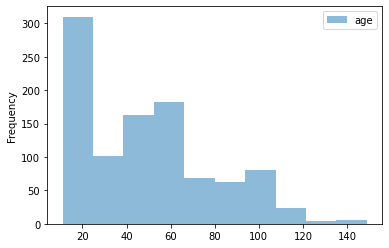

In [8]:
# Histograma
ames_train.loc[:, ['age']].plot.hist(alpha=0.5)

O gráfico mostra a distribuição da idade das casas. É possível perceber que muitas casas tem até 20 anos e poucas são as casas com mais de 100 anos. O quadro acima confirma essa observação, já que 50% das casas tem idade de até 46 anos.

# Preço por idade

In [9]:
# Índice de correlação de Pearson
age_corr = price.corr(age) # -0.5774753071012863 : correlação negativa alta
age_corr

-0.5774753071012863

<AxesSubplot:xlabel='age', ylabel='price'>

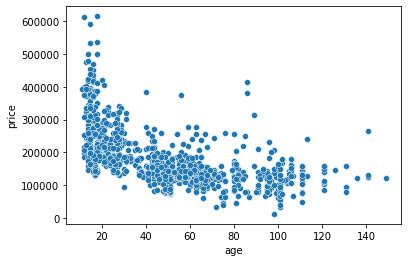

In [10]:
# Gráfico de dispersão
sns.scatterplot(data=ames_train, x="age", y="price")

Pode-se sustentar que as variáveis preço e idade possuem uma correlação negativa. Ou seja, quanto maior a idade da casa, provavelmente menor será o seu preço.

# Área

In [11]:
# Área
area = ames_train['area']

In [12]:
# Estatísticas
ames_train.loc[:, ['area']].describe()

,area
count,1000.000000
mean,1476.615000
std,505.174189
min,334.000000
25%,1092.000000
50%,1411.000000
75%,1743.250000
max,4676.000000


<AxesSubplot:ylabel='Frequency'>

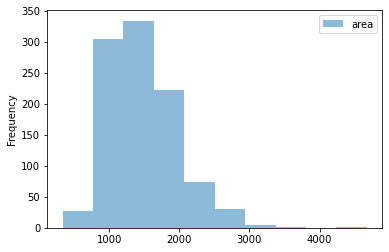

In [13]:
# Histograma
ames_train.loc[:, ['area']].plot.hist(alpha=0.5)

A partir do histograma, observa-se que a maioria das casas tem até 2000 pés quadrados (ou seja, 186 m²).

# Preço por área

In [14]:
# Índice de correlação de Pearson
area_corr = price.corr(area) # 0.7127375354788064 : correlação positiva alta
area_corr

0.7127375354788064

<AxesSubplot:xlabel='area', ylabel='price'>

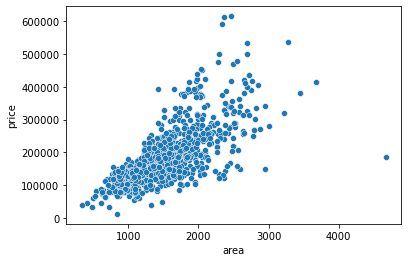

In [15]:
# Gráfico de dispersão
sns.scatterplot(data=ames_train, x="area", y="price")

O gráfico acima sustenta que há uma forte correlação positiva entre as variáveis área e preço. Ou seja, quanto maior o tamanho da casa, maior tende a ser o seu preço.

# Cômodos

In [16]:
# Número de banheiros
# Full.Bath/ Half.Bath
bathrooms = (ames_train['Full.Bath'] + ames_train['Half.Bath'])

# Estatísticas
bathrooms.describe() # 75% das casas tem até 2 banheiros

count    1000.000000
mean        1.919000
std         0.799424
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         6.000000
dtype: float64

In [17]:
# Número de quartos
bedrooms = ames_train['Bedroom.AbvGr']

# Estatísticas
bedrooms.describe() # 75% das casas tem até 3 quartos

count    1000.000000
mean        2.806000
std         0.833702
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: Bedroom.AbvGr, dtype: float64

In [20]:
# Garagem (número de carros)
cars = ames_train['Garage.Cars']

# Estatísticas
cars.describe() # 75% das garagens comportam até 2 carros

count    999.000000
mean       1.766767
std        0.764084
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        5.000000
Name: Garage.Cars, dtype: float64

# Preço e cômodos

In [21]:
# Número de banheiros

# Índice de correlação de Pearson

# Número de banheiros
bath_corr = price.corr(bathrooms) # 0.5399888048007572 : correlação positiva alta
print("correlação entre número de banheiros e preço: " + str(bath_corr))

# Número de quartos
bedrooms_corr = price.corr(bedrooms) # 0.14016006039850182 : correlação positiva fraca
print("correlação entre número de quartos e preço: " + str(bedrooms_corr))

# Garagem (número de carros)
cars_corr = price.corr(cars) # 0.6648278094591338 : correlação positiva alta
print("correlação entre número de carros que cabem na garagem e preço: " + str(cars_corr))

correlação entre número de banheiros e preço: 0.5399888048007572
correlação entre número de quartos e preço: 0.14016006039850182
correlação entre número de carros que cabem na garagem e preço: 0.6648278094591338


# Localização

In [22]:
# Vizinhança
neighborhood = ames_train['Neighborhood']

In [23]:
# Estatísticas
ames_train.loc[:, ['Neighborhood']].describe()

,Neighborhood
count,1000
unique,27
top,NAmes
freq,155


# Preço por vizinhança

In [24]:
# Vizinhança por preço

# Agrupamento e estatísticas
ames_neighborhood = ames_train.loc[:, ['price','Neighborhood']]
ames_neighborhood['count'] = ames_neighborhood.groupby('Neighborhood').transform(len)
ames_neighborhood['mean'] = ames_neighborhood.groupby('Neighborhood')["price"].transform('mean')
ames_neighborhood['std'] = ames_neighborhood.groupby('Neighborhood')["price"].transform('std')
ames_neighborhood = ames_neighborhood.loc[ames_neighborhood['count'] >= 60] # recorte de amostra
groupedByNeighborhood = ames_neighborhood.groupby('Neighborhood')
groupedByNeighborhood.first()

,price,count,mean,std
Neighborhood,,,,
CollgCr,214000,85,196950.858824,52786.080020
Edwards,139500,60,136322.016667,54851.628237
NAmes,159000,155,141355.974194,27267.973553
OldTown,114000,71,120225.605634,36429.692699
Sawyer,133500,61,139312.704918,21216.222480
Somerst,177500,74,234595.878378,65199.493295


<AxesSubplot:title={'center':'price'}, xlabel='[Neighborhood]'>

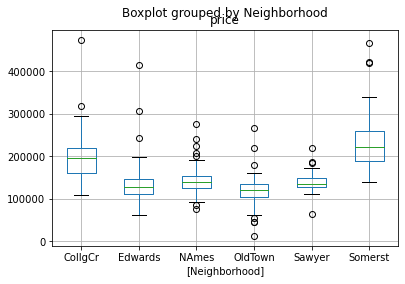

In [25]:
# Boxplot
ames_neighborhood.boxplot(column=['price'], by=['Neighborhood'])

Pode-se observar acima o comportamento do preço por vizinhança. Por motivos de visualização e capacidade de análise, foram selecionadas as vizinhanças que possuem um maior número de amostras na base de dados. A partir do boxplot, é possível perceber que algumas vizinhanças costumam ter casas com preços mais baixos e de pouca variação, como Edwards, NAmes, OldTown e Sawyer. As vizinhanças CollgCr e Somerst costumam ter preços maiores (se comparados com os das outras quatro vizinhanças) e que variam mais entre si.